In [49]:
import os
import re
import json
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from random import sample

In [50]:
data_path = os.path.join('..', 'data')
dialogsum_path = os.path.join(data_path, 'dialogsum', 'DialogSum_Data')
samsum_path = os.path.join(data_path, 'SAMSum')
#mediasum_path = os.path.join(data_path, 'mediasum', 'news_dialogue.json')

In [51]:
def print_size_and_concat(dfs):
    total_size = 0
    for key, val in dfs.items():
        size = len(val)
        print(f'{key}size',size)
        total_size += size
        
    print('Total size', total_size)
    df = pd.concat(list(dfs.values()))
    return df


def print_nth_row(df, n=0):
    line_0 = df.iloc[n]
    for key in line_0.keys():
        print(key.upper())
        print(line_0[key])
        print('')
        
def print_n_rows(df, n=20):
    for i in range(n):
        line = df.iloc[i]
        for key in line.keys():
            print(key.upper())
            print(line[key])
            print('')
            
def print_ith_row(df, i):
    line_i = df.iloc[i]
    dialogue = line_i['dialogue'].split('\n')
    for utt in dialogue:
        print(utt)
    
    print('\n\n')
    
    label = line_i['summary1']
    print(label)

# Dialogsum

In [52]:
test_path = os.path.join(dialogsum_path, 'dialogsum.test.jsonl')
dialogsum_test_df = pd.read_json(test_path, lines=True)

In [53]:
dialogsum_test_df

,fname,dialogue,summary1,topic1,summary2,topic2,summary3,topic3
0,test_0,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson helps #Person1# to write a memo to ...,communication method,In order to prevent employees from wasting tim...,company policy,Ms. Dawson takes a dictation for #Person1# abo...,dictation
1,test_1,#Person1#: You're finally here! What took so l...,#Person2# arrives late because of traffic jam....,public transportation,#Person2# decides to follow #Person1#'s sugges...,transportation,#Person2# complains to #Person1# about the tra...,discuss transportation
2,test_2,"#Person1#: Kate, you never believe what's happ...",#Person1# tells Kate that Masha and Hero get d...,divorce,#Person1# tells Kate that Masha and Hero are g...,divorce,#Person1# and Kate talk about the divorce betw...,discuss divorce
3,test_3,"#Person1#: Happy Birthday, this is for you, Br...",#Person1# and Brian are at the birthday party ...,birthday party,#Person1# attends Brian's birthday party. Bria...,birthday party,#Person1# has a dance with Brian at Brian's bi...,birthday party
4,test_4,#Person1#: This Olympic park is so big!\n#Pers...,#Person1# is surprised at the Olympic Stadium'...,Olympic Stadium,#Person2# shows #Person1# around the construct...,sports stadium,#Person2# introduces the Olympic Stadium's fin...,Olympic Stadium
...,...,...,...,...,...,...,...,...
495,test_495,"#Person1#: Hey, Charlie, do you want to come t...",Jack invites Charlie to play a new video game ...,video game invitation,Jack asks Charlie to come over and play the ne...,\n\nentertainment activity schedule,Jack invites Charlie to play video games after...,play game
496,test_496,#Person1#: How did you get interested in count...,#Person2# explains to #Person1# about how #Per...,conversation about interest,#Person2# shares #Person2#'s career in the pas...,work experience,#Person2# tells #Person1# about #Person2#'s ow...,country music
497,test_497,"#Person1#: Excuse me, Alice, I've never used t...",Alice guides #Person1# to use the washing mach...,campus conversation,#Person1# asks Alice how to use the washing ma...,campus life conversation,#Person1# doesn't know how to use the washing ...,clothes washing
498,test_498,#Person1#: Matthew? Hi!\n#Person2#: Steve! Hav...,Steve is looking for a new place to live and M...,house renting,Matthew and Steve meet after a long time. Stev...,finding a house,Steve has been looking for a place to live. Ma...,find a house


In [54]:
print_ith_row(dialogsum_test_df, 6)

#Person1#: What's wrong with you? Why are you scratching so much?
#Person2#: I feel itchy! I can't stand it anymore! I think I may be coming down with something. I feel lightheaded and weak.
#Person1#: Let me have a look. Whoa! Get away from me!
#Person2#: What's wrong?
#Person1#: I think you have chicken pox! You are contagious! Get away! Don't breathe on me!
#Person2#: Maybe it's just a rash or an allergy! We can't be sure until I see a doctor.
#Person1#: Well in the meantime you are a biohazard! I didn't get it when I was a kid and I've heard that you can even die if you get it as an adult!
#Person2#: Are you serious? You always blow things out of proportion. In any case, I think I'll go take an oatmeal bath.



#Person2# feels itchy. #Person1# doubts it is chicken pox and asks #Person2# to get away. #Person2# doesn't believe it.


In [55]:
print_nth_row(dialogsum_test_df)

FNAME
test_0

DIALOGUE
#Person1#: Ms. Dawson, I need you to take a dictation for me.
#Person2#: Yes, sir...
#Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready?
#Person2#: Yes, sir. Go ahead.
#Person1#: Attention all staff... Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited.
#Person2#: Sir, does this apply to intra-office communications only? Or will it also restrict external communications?
#Person1#: It should apply to all communications, not only in this office between employees, but also any outside communications.
#Person2#: But sir, many employees use Instant Messaging to communicate with their clients.
#Person1#: They will just have to change their communication methods. I don't want any - one using Instant Messaging in this office. It wastes too much time! Now, please con

In [56]:
dev_path = os.path.join(dialogsum_path, 'dialogsum.dev.jsonl')
dialogsum_dev_df = pd.read_json(dev_path, lines=True)

train_path = os.path.join(dialogsum_path, 'dialogsum.train.jsonl')
dialogsum_train_df = pd.read_json(train_path, lines=True)

In [57]:
dialogsum_df = print_size_and_concat({
    'Train': dialogsum_train_df,
    'Dev': dialogsum_dev_df,
    'Test': dialogsum_test_df,
})

Trainsize 12460
Devsize 500
Testsize 500
Total size 13460


In [58]:
tmp_df = dialogsum_df[dialogsum_df['dialogue'].str.contains('#Person3#') == True]
tmp_df

,fname,dialogue,summary,topic,summary1,topic1,summary2,topic2,summary3,topic3
39,train_39,#Person1#: Please make yourselves at home. Let...,"Ellen and #Person3# visit Armand's house, and ...",have a dinner,NaN,NaN,NaN,NaN,NaN,NaN
236,train_236,#Person1#: This is ridiculous! I can't believe...,The doctor tells a lie to #Person1# and #Perso...,a lie,NaN,NaN,NaN,NaN,NaN,NaN
433,train_433,"#Person1#: You know, I don't quite understand ...","#Person1#, #Person2#, and #Person3# are discus...",beauty and love,NaN,NaN,NaN,NaN,NaN,NaN
476,train_476,"#Person1#: Stay with me, kids. Don't get lost....",#Person1# asks #Person2# and #Person3# to stay...,in the supermarket,NaN,NaN,NaN,NaN,NaN,NaN
574,train_574,"#Person1#: Hey, look at these paintings on the...","Linda bought good paintings. #Person1#, Cindy ...",Chinese habits,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
440,dev_440,#Person1#: Susan has got the cancer of stomach...,#Person1# tells #Person2# Susan got stomach ca...,stomach cancer,NaN,NaN,NaN,NaN,NaN,NaN
140,test_140,"#Person1#: Honey, of course I forgive you! I l...",NaN,NaN,#Person1# calls #Person2# to tell him that she...,pregnancy,#Person1# calls #Person2# to tell him that she...,pregnant,#Person1# apologises to #Person2# after the qu...,pregnancy test
293,test_293,"#Person1#: Good evening, Pete. I trust you had...",NaN,NaN,#Person1# introduces Henry to Pete. The three ...,\nintroducing new friend,"#Person1# introduces Henry Johnson, an expat i...",gathering,#Person1# introduces Henry Johnson to Pete for...,social meeting
336,test_336,"#Person1#: Hello sir, welcome to the French Ga...",NaN,NaN,#Person2# is at French Garden Restaurant and h...,order food,#Person1# helps #Person2# find a seat and #Per...,restaurant service,#Person2# orders some food with #Person3#'s he...,in a restaurant


In [59]:
regex = '#Person\w+#'
topics = defaultdict(lambda: 0)
multi_party = False
len_person_1 = 0
len_person_2 = 0
for index, rows in dialogsum_df.iterrows():
    for t in ['topic1', 'topic2', 'topic3']:
        s = rows[t]
        topics[s] += 1
    
    dialogue = rows['dialogue']
    multi_party = len(set(re.findall(regex, dialogue))) > 2
    for line in dialogue.split('\n'):
        length = len(line) - len('#PersonX#: ')
        if 'Person1' in line:
            len_person_1 += length
        else:
            len_person_2 += length
            
print('Multiparty dialogue available:', multi_party)

Multiparty dialogue available: False


In [60]:
print(len(topics), 'topics in total\n')

for s in sample(topics.keys(), 10):
    print(s)

1155 topics in total

an eyelash curler
Thanksgiving Day
plan to run a farm
a new puppy
food for dinner
companies competition
workplace dressing style
different impressions
use the library
employment requests


In [61]:
topics['nan']

0

In [62]:
max_no = 0
NAN_key = ''
for k in topics:
    if max_no < topics[k]:
        NAN_key = k
        max_no = max(max_no, topics[k])
    
    if topics[k] > 3:
        print(k, topics[k])
        
print(f'\n{max_no}')

nan 38880
transportation 4
divorce 4
birthday party 5
shopping 19
job interview 15
restaurant service 7
farewell 4
buying a house 4
phone call 5
ask directions 4
pregnancy 4
work talk 4
picnic 5
borrow money 9
diet 5
holiday plan 6
Chinese cuisine 4
interview 4
weather 4
ask for help 6
asking for help 4
ordering food 5
order food 9
restaurant 5
daily conversation 5
food ordering 5
in a restaurant 4
luggage storage 4

38880


<BarContainer object of 1155 artists>

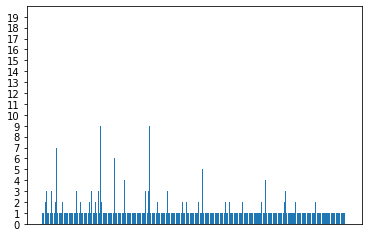

In [63]:
import math

tmp = dict(topics.copy())
del tmp[NAN_key]
x = list(tmp.keys())
y = list(tmp.values())
yint = range(0, math.ceil(max(y))+1)
plt.yticks(yint)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.bar(x, y)

Percentage Speaker 1: 49.18231341117635%
Percentage Speaker 2: 50.817686588823655%


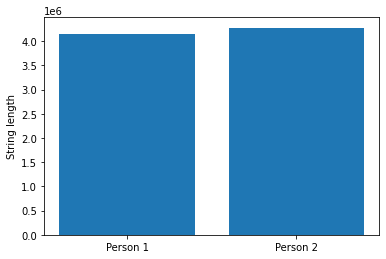

In [68]:
labels = ['Person 1', 'Person 2']
plt.bar(labels, [len_person_1, len_person_2])
plt.ylabel('String length')
plt.savefig('dialogsum_distribution.png')
total_length = len_person_1 + len_person_2
percent_1 = len_person_1 / total_length * 100
percent_2 = len_person_2 / total_length * 100
print(f'Percentage Speaker 1: {percent_1}%')
print(f'Percentage Speaker 2: {percent_2}%')

In [69]:
        print("#Person1#: Good morning. What can I do for you?\n#Person2#: Well, I hate to disturb you, but I really can't stand it any more. Can you change my room for me? It's too noisy. I was woken up several times by the noise the baggage elevator made. It was too much for me.\n#Person1#: I'm sorry to hear that. This room is at the end of the corridor. It's possible that the noise is heard early in the morning when everything is quiet.\n#Person2#: Anyhow, I'd like to change my room.\n#Person1#: I'm awfully sorry, Miss. I do apologize. We'll manage it, but we don't have any spare room today. Could you wait till tomorrow? A tour company will be leaving tomorrow morning. There'll be some rooms for you to choose from.\n#Person2#: All right. I hope I'll be able to enjoy my stay in a quiet suite tomorrow evening and have a sound sleep.\n#Person1#: Be sure. And if there is anything more you need, please let us know.\n#Person2#: OK. Thank you.\n#Person1#: You're welcome. I hope you'll be more comfortable in your new room.")

#Person1#: Good morning. What can I do for you?
#Person2#: Well, I hate to disturb you, but I really can't stand it any more. Can you change my room for me? It's too noisy. I was woken up several times by the noise the baggage elevator made. It was too much for me.
#Person1#: I'm sorry to hear that. This room is at the end of the corridor. It's possible that the noise is heard early in the morning when everything is quiet.
#Person2#: Anyhow, I'd like to change my room.
#Person1#: I'm awfully sorry, Miss. I do apologize. We'll manage it, but we don't have any spare room today. Could you wait till tomorrow? A tour company will be leaving tomorrow morning. There'll be some rooms for you to choose from.
#Person2#: All right. I hope I'll be able to enjoy my stay in a quiet suite tomorrow evening and have a sound sleep.
#Person1#: Be sure. And if there is anything more you need, please let us know.
#Person2#: OK. Thank you.
#Person1#: You're welcome. I hope you'll be more comfortable in your

# SAMSum

In [31]:
from pandas.io.json import json_normalize

def create_df_samsum(path):
    with open(path, 'r') as f:
        d = json.load(f)
    
    df = pd.DataFrame(d)
    return df


test_path = os.path.join(samsum_path, 'test.json')
samsum_test_df = create_df_samsum(test_path)
val_path = os.path.join(samsum_path, 'val.json')
samsum_val_df = create_df_samsum(val_path)
train_path = os.path.join(samsum_path, 'train.json')
samsum_train_df = create_df_samsum(train_path)


In [32]:
samsum_test_df

,id,summary,dialogue
0,13862856,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman..."
1,13729565,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...
2,13680171,Lenny can't decide which trousers to buy. Bob ...,"Lenny: Babe, can you help me with something?\r..."
3,13729438,Emma will be home soon and she will let Will k...,"Will: hey babe, what do you want for dinner to..."
4,13828600,Jane is in Warsaw. Ollie and Jane has a party....,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju..."
...,...,...,...
814,13611902-1,Benjamin didn't come to see a basketball game ...,Alex: Were you able to attend Friday night's b...
815,13820989,The audition starts at 7.30 P.M. in Antena 3.,Jamilla: remember that the audition starts at ...
816,13717193,"Marta sent a file accidentally,","Marta: <file_gif>\r\nMarta: Sorry girls, I cli..."
817,13829115,There was a meet-and-greet with James Charles ...,Cora: Have you heard how much fuss British med...


In [33]:
samsum_df = print_size_and_concat({
    'Train': samsum_train_df,
    'Val': samsum_val_df,
    'Test': samsum_test_df
})
samsum_df.reset_index(inplace=True)

Trainsize 14732
Valsize 818
Testsize 819
Total size 16369


In [34]:
samsum_df.head()

,index,id,summary,dialogue
0,0,13818513,Amanda baked cookies and will bring Jerry some...,Amanda: I baked cookies. Do you want some?\r\...
1,1,13728867,Olivia and Olivier are voting for liberals in ...,Olivia: Who are you voting for in this electio...
2,2,13681000,Kim may try the pomodoro technique recommended...,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa..."
3,3,13730747,Edward thinks he is in love with Bella. Rachel...,"Edward: Rachel, I think I'm in ove with Bella...."
4,4,13728094,"Sam is confused, because he overheard Rick com...",Sam: hey overheard rick say something\r\nSam:...


In [35]:
i = 0

In [36]:
print_nth_row(samsum_df, i)
i += 1

INDEX
0

ID
13818513

SUMMARY
Amanda baked cookies and will bring Jerry some tomorrow.

DIALOGUE
Amanda: I baked  cookies. Do you want some?
Jerry: Sure!
Amanda: I'll bring you tomorrow :-)



In [37]:
from tqdm.notebook import tqdm

def count_participants(df):
    counts = {}
    failures = []
    two_persons = []
    for i, row in tqdm(df.iterrows()):
        dlg = row['dialogue']
        if len(dlg) == 0:
            failures.append(i)
            continue
            
        speakers = get_speaker(dlg)
        no_speakers = len(set(speakers))
        if no_speakers not in counts:
            counts[no_speakers] = 0
        counts[no_speakers] += 1
        if no_speakers == 2:
            two_persons.append(dlg)
    
    return counts, failures, two_persons
    
def get_speaker(dlg):
    utts = dlg.split('\n')
    speakers = set()
    for utt in utts:
        speaker = ''
        for c in utt:
            if c == ':':
                speakers.add(speaker)
                break
            speaker += c
    
    return speakers
        

speaker_count, failures,two_persons = count_participants(samsum_df)

0it [00:00, ?it/s]

In [38]:
speaker_count, failures, len(two_persons)

({2: 11946,
  3: 3121,
  4: 923,
  9: 14,
  5: 210,
  7: 32,
  6: 87,
  12: 3,
  8: 16,
  11: 6,
  10: 6,
  13: 2,
  14: 2},
 [6054],
 11946)

Percentage of 2-Speaker-Dialogues: 73.1932311075814%


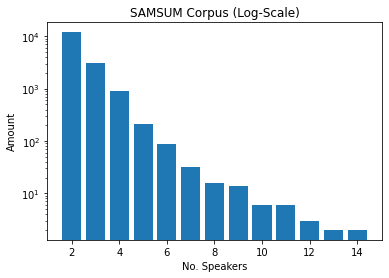

In [310]:
labels = [k for k in speaker_count]
plt.bar(labels, [v for v in speaker_count.values()])
plt.yscale('log')
plt.xlabel('No. Speakers')
plt.ylabel('Amount')
plt.title('SAMSUM Corpus (Log-Scale)')

total_length = len(samsum_df)
percentage = speaker_count[2] / total_length * 100
print(f'Percentage of 2-Speaker-Dialogues: {percentage}%')

Percentage of 2-Speaker-Dialogues: 73.1932311075814%


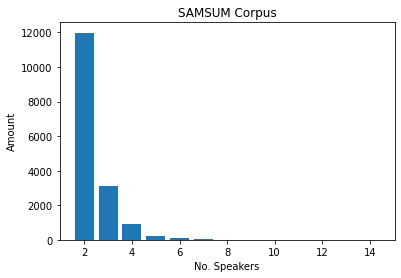

In [311]:
labels = [k for k in speaker_count]
plt.bar(labels, [v for v in speaker_count.values()])
plt.xlabel('No. Speakers')
plt.ylabel('Amount')
plt.title('SAMSUM Corpus')

total_length = len(samsum_df)
percentage = speaker_count[2] / total_length * 100
print(f'Percentage of 2-Speaker-Dialogues: {percentage}%')

In [41]:
def strip_name(dlg):
    utts = dlg.split('\r\n')
    p_1 = []
    p_2 = []
    for idx, utt in enumerate(utts):
        statement = utt.split(': ')[1]
        if (idx+1) % 2 != 0:
            p_2.append(statement)
        else:
            p_1.append(statement)
            
    return p_1, p_2

In [45]:
len_person_1 = 0
len_person_2 = 0
for dialogue in two_persons:
    dialogue = rows['dialogue']
    p_1, p_2 = strip_name(dialogue)
    len_person_1 += len(p_1)
    len_person_2 += len(p_2)

total_length = speaker_count[2]

In [48]:
p_2

['I baked  cookies. Do you want some?', "I'll bring you tomorrow :-)"]

Percentage Speaker 1: 33.33333333333333%
Percentage Speaker 2: 66.66666666666666%


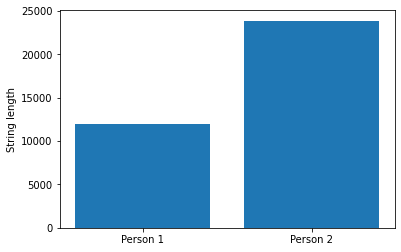

In [46]:
labels = ['Person 1', 'Person 2']
plt.bar(labels, [len_person_1, len_person_2])
plt.ylabel('String length')

total_length = len_person_1 + len_person_2
percent_1 = len_person_1 / total_length * 100
percent_2 = len_person_2 / total_length * 100
print(f'Percentage Speaker 1: {percent_1}%')
print(f'Percentage Speaker 2: {percent_2}%')